# Task 1.3 Clustering

In [4]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.cluster as cluster
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans


In [5]:
#TODO: mettere i dataset ottenuti alla fine di Preparation
# We load the updated datasets
df_incidents = pd.read_csv('../dataset_preparation/incidents_prepared.csv', sep=',', index_col=0)

df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164507 entries, 2015-05-02 to 2015-05-05
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   state                      164507 non-null  object 
 1   city_or_county             164507 non-null  object 
 2   address                    152623 non-null  object 
 3   latitude                   164507 non-null  float64
 4   longitude                  164507 non-null  float64
 5   congressional_district     164507 non-null  float64
 6   avg_age_participants       164507 non-null  float64
 7   n_participants_child       164507 non-null  float64
 8   n_participants_teen        164507 non-null  float64
 9   n_participants_adult       164507 non-null  float64
 10  n_arrested                 164507 non-null  float64
 11  n_participants             164507 non-null  float64
 12  incident_characteristics1  164507 non-null  object 
 13  age_group            

In [6]:
cols_to_keep=[	'avg_age_participants',	'severity', 'severity_minor', 'killed_by_district'	,'injured_by_district',	'female_ratio', 'povertyPercentage', 'arrested_ratio', 'unharmed_ratio']

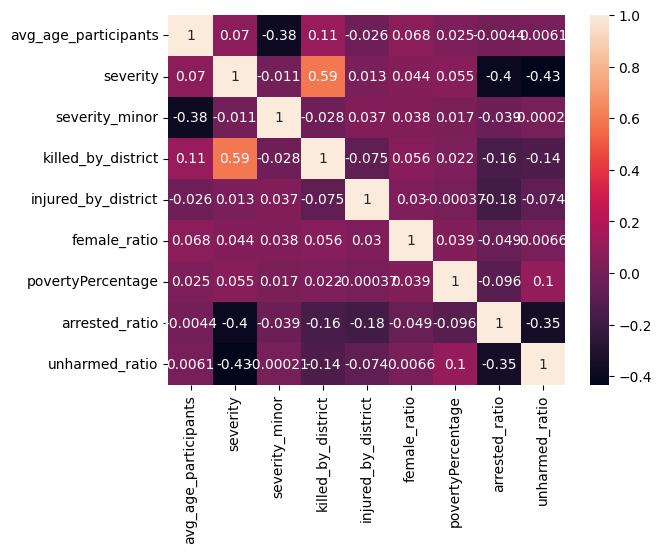

In [7]:
# drop the columns that we don't need
df_incidents_clustering = df_incidents[cols_to_keep]
# plot the correlation matrix
corr = df_incidents_clustering.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True,)
plt.show()

In [8]:
scaler = StandardScaler()
df_incidents_scaled = scaler.fit_transform(df_incidents_clustering)
df_incidents_scaled = pd.DataFrame(df_incidents_scaled, columns=df_incidents_clustering.columns)
df_incidents_scaled.describe()



,avg_age_participants,severity,severity_minor,killed_by_district,injured_by_district,female_ratio,povertyPercentage,arrested_ratio,unharmed_ratio
count,1.645070e+05,1.645070e+05,1.645070e+05,1.645070e+05,1.645070e+05,1.645070e+05,1.645070e+05,1.645070e+05,1.645070e+05
mean,-2.349658e-16,1.503954e-16,-5.226262e-17,1.382152e-18,-1.382152e-18,7.662305e-17,2.095256e-16,-1.384312e-17,-3.127119e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-2.421067e+00,-1.088116e+00,-3.253409e-01,-4.435441e-01,-4.936819e-01,-4.344347e-01,-2.629409e+00,-7.299500e-01,-5.688986e-01
25%,-7.307109e-01,-1.088116e+00,-3.253409e-01,-4.435441e-01,-4.936819e-01,-4.344347e-01,-6.602944e-01,-7.299500e-01,-5.688986e-01
50%,-2.477520e-01,1.045354e-01,-3.253409e-01,-4.435441e-01,-4.936819e-01,-4.344347e-01,-1.133182e-01,-7.299500e-01,-5.688986e-01
75%,4.766864e-01,3.033105e-01,-3.253409e-01,-6.255982e-02,3.938710e-02,-4.344347e-01,5.430532e-01,5.053104e-01,6.676569e-01
max,5.306276e+00,1.694737e+00,6.709114e+00,4.128267e+00,4.303939e+00,3.621059e+00,3.350864e+00,1.740571e+00,2.522490e+00


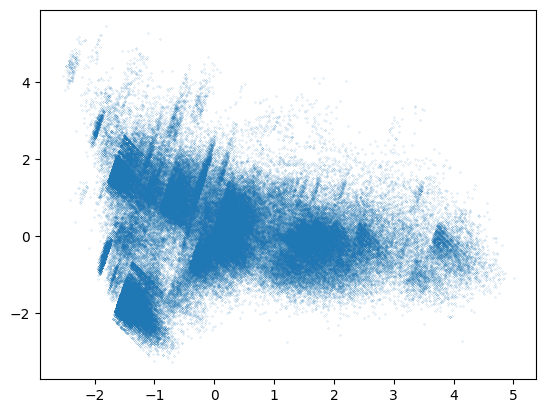

In [9]:
# pca in order to reduce the dimensionality of the dataset
pca = PCA(n_components=2)
df_incidents_pca = pca.fit_transform(df_incidents_scaled)
# plot the results
plt.scatter(df_incidents_pca[:,0], df_incidents_pca[:,1], s=0.01)



In [10]:
# elboe method to find the optimal number of clusters
kmeans=[]
inertia = []
for i in range(1, 11):
    kmeans.append( KMeans(n_clusters=i, random_state=0).fit(df_incidents_scaled) )
    inertia.append(kmeans[i-1].inertia_)



c:\Users\HUAWEI\PycharmProjects\DM-project\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HUAWEI\PycharmProjects\DM-project\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HUAWEI\PycharmProjects\DM-project\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HUAWEI\PycharmProjects\DM-project\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureW

([<matplotlib.axis.XTick at 0x13556deec50>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

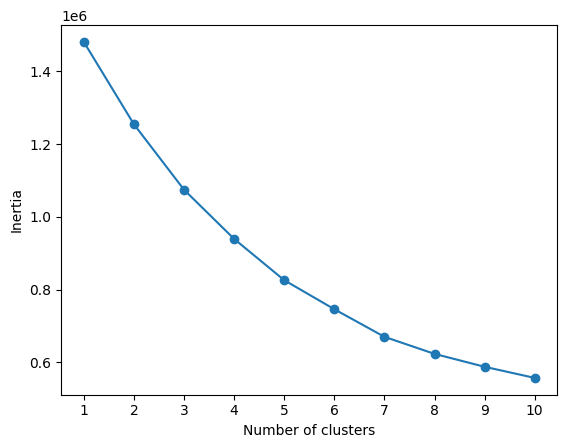

In [11]:
plt.plot( range(1,11),inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
# change numbers on x axis
plt.xticks(np.arange(1, 11, step=1))

In [12]:
#we choose 5 clusters
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10).fit(df_incidents_scaled)
df_incidents['cluster'] = kmeans.labels_
df_incidents['cluster'].value_counts()



cluster
3    55756
0    37145
1    36875
2    34731
Name: count, dtype: int64

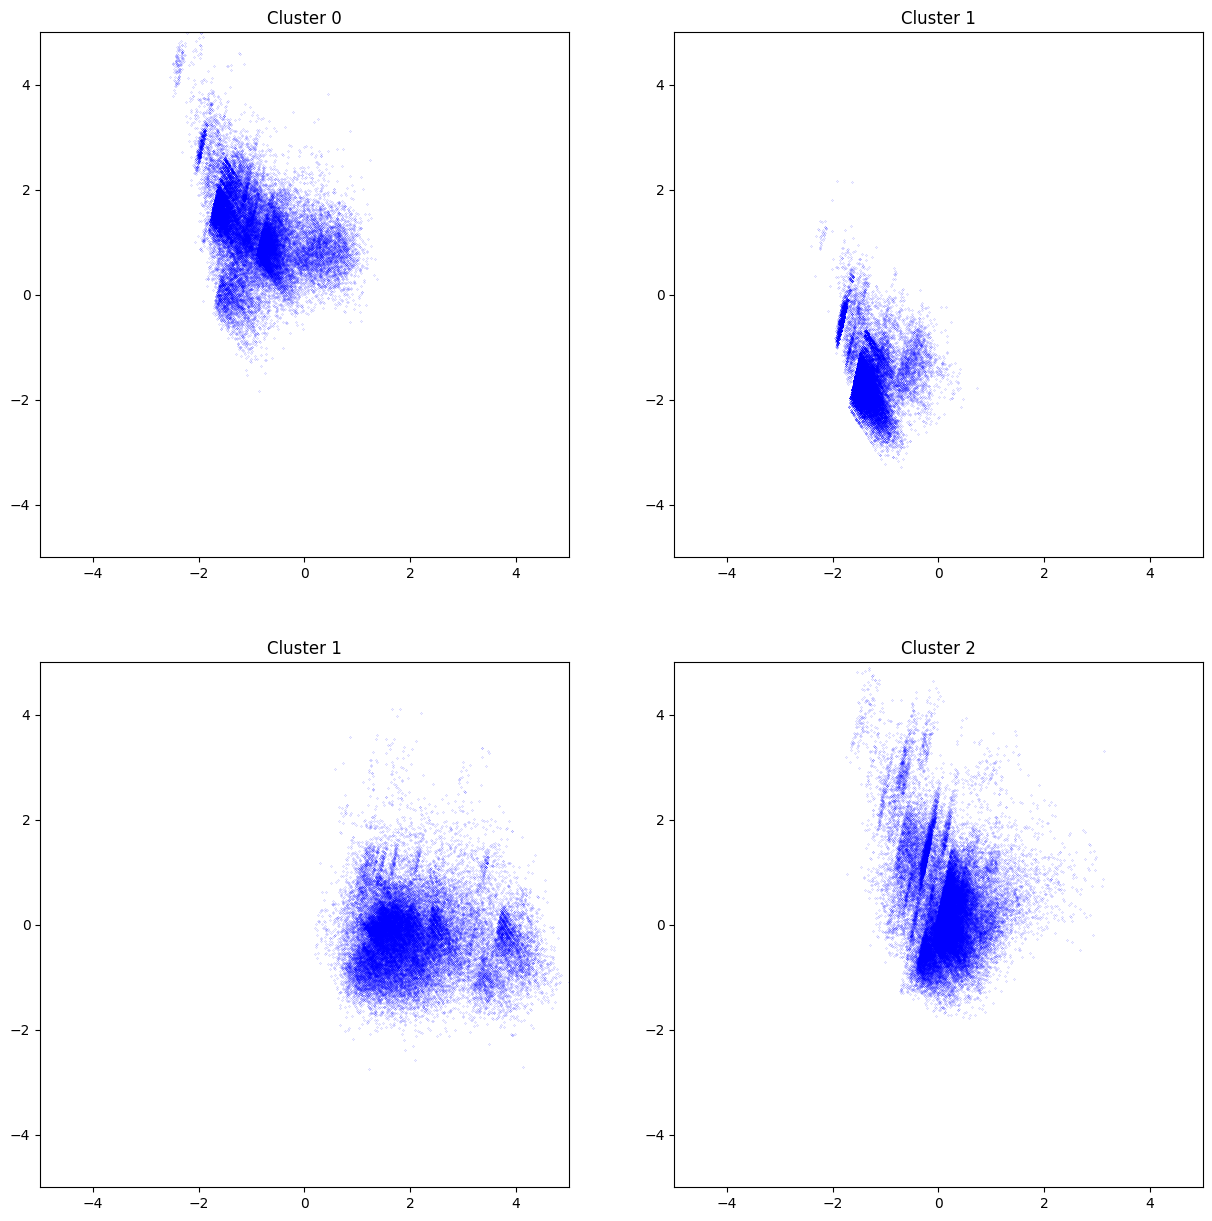

In [13]:
# plot the clusters one by one
fig, ax = plt.subplots(2,2, figsize=(15,15))
for i in range(2):
    for j in range(2):
        ax[i,j].scatter(df_incidents_pca[df_incidents['cluster']==i+2*j,0], df_incidents_pca[df_incidents['cluster']==i+2*j,1], c= 'b', s=0.01)
        ax[i,j].set_title('Cluster ' + str(i+j))
        ax[i,j].set_xlim(-5, 5)
        ax[i,j].set_ylim(-5, 5)

<Axes: xlabel='cluster', ylabel='count'>

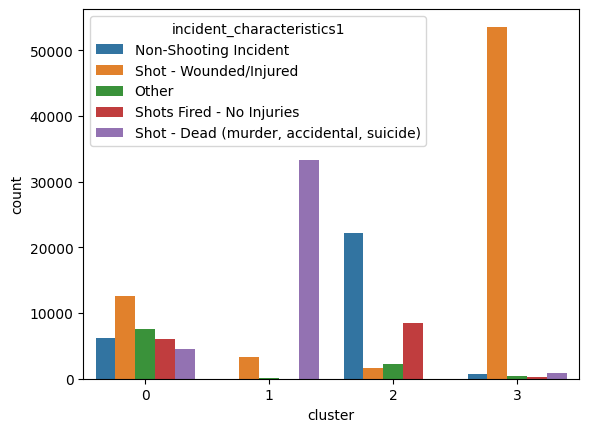

In [14]:
sns.countplot(data=df_incidents, x='cluster', hue='incident_characteristics1')


In [15]:
# x-means
from pyclustering.cluster.xmeans import xmeans
# prepare initial centers - amount of initial centers defines amount of clusters from which X-Means will
# start analysis.
# choose two points at random in the dataset
initial_centers = np.random.randint(0, len(df_incidents_scaled), 2)
initial_centers = df_incidents_scaled.iloc[initial_centers].values

# create instance of X-Means algorithm. The algorithm will start analysis from 2 clusters, the maximum
# number of clusters that can be allocated is 20.
xmeans_instance = xmeans(df_incidents_scaled, initial_centers, 20, ccore=False)
# run cluster analysis
xmeans_instance.process()
# obtain results of clustering
clusters = xmeans_instance.get_clusters()
# obtain cluster centroids
centroids = xmeans_instance.get_centers()


KeyError: 0

In [23]:
df_incidents['xmeans_cluster'] = -1
for i in range(len(clusters)):
    df_incidents.iloc[clusters[i]]=df_incidents.iloc[clusters[i]]['xmeans_cluster'] = i
df_incidents['xmeans_cluster'].value_counts()


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_26336\2250884708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incidents.iloc[clusters[i]]=df_incidents.iloc[clusters[i]]['xmeans_cluster'] = i


xmeans_cluster
12    28214
16    19219
9     19115
5     14320
4     13129
0      8316
17     7929
14     7914
8      7710
18     6003
19     5973
10     5953
1      4774
2      4514
6      3053
13     2976
11     2510
15     1172
7      1005
3       708
Name: count, dtype: int64

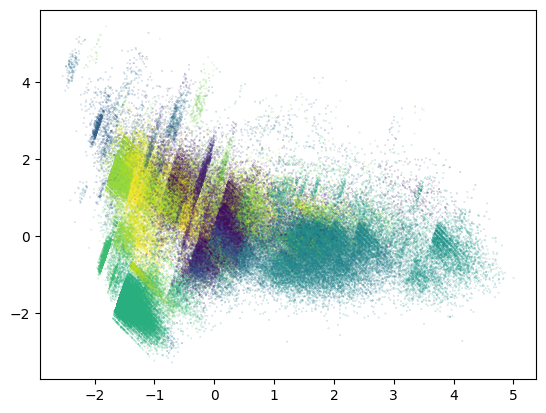

In [24]:
plt.scatter(df_incidents_pca[:,0], df_incidents_pca[:,1], c=df_incidents['xmeans_cluster'], s=0.01)

In [ ]:
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample
 
# Load list of points for cluster analysis.
sample = read_sample(FCPS_SAMPLES.SAMPLE_TWO_DIAMONDS)
 
# Prepare initial centers using K-Means++ method.
initial_centers = kmeans_plusplus_initializer(sample, 2).initialize()
 
# Create instance of K-Means algorithm with prepared centers.
kmeans_instance = kmeans(sample, initial_centers)
 
# Run cluster analysis and obtain results.
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()
final_centers = kmeans_instance.get_centers()
 
# Visualize obtained results
kmeans_visualizer.show_clusters(sample, clusters, final_centers)

AttributeError: module 'numpy' has no attribute 'warnings'